In [2]:
import cv2
import glob
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib

In [12]:
def process_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    frame = ((frame[..., 2] > 128) * 255).astype(np.uint8)
#     frame = cv2.resize(
#         frame,
#         (96, 96),
#         interpolation=cv2.INTER_AREA,
#     )
    return frame

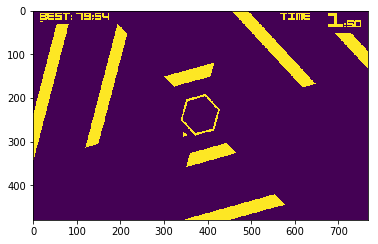

In [54]:
for frame_path in glob.glob('../screenshots/screenshot_*.png'):
    frame = imageio.imread(frame_path)
#     plt.figure()
#     plt.imshow(frame)
    
    plt.figure()
    plt.imshow(process_frame(frame))
    
#     center = process_frame(frame)[278:292, 342:354]
#     print(repr(center))
#     plt.imshow(center)
    
    break

In [80]:
ship = (255 * np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
     [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
     [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
)).astype(np.uint8)

ship_contour = cv2.findContours(ship, cv2.RETR_LIST, 1)[1][0]
print(ship_contour)

[[[ 5  1]]

 [[ 5  2]]

 [[ 4  3]]

 [[ 4  4]]

 [[ 3  5]]

 [[ 3  6]]

 [[ 3  7]]

 [[ 2  8]]

 [[ 2  9]]

 [[ 1 10]]

 [[ 2 10]]

 [[ 3 10]]

 [[ 4 10]]

 [[ 5 10]]

 [[ 6 10]]

 [[ 7  9]]

 [[ 8  9]]

 [[ 9  9]]

 [[10  9]]

 [[11  9]]

 [[10  8]]

 [[ 9  7]]

 [[ 9  6]]

 [[ 8  5]]

 [[ 8  4]]

 [[ 7  3]]

 [[ 6  2]]

 [[ 6  1]]]


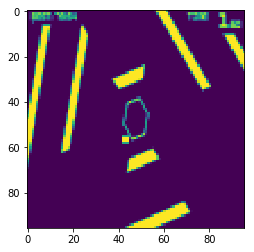

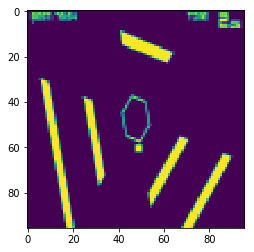

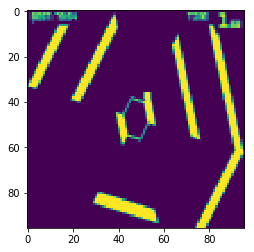

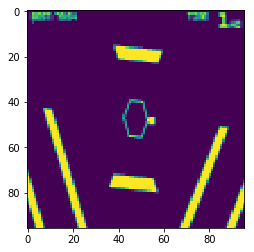

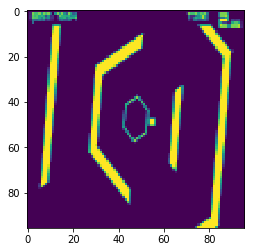

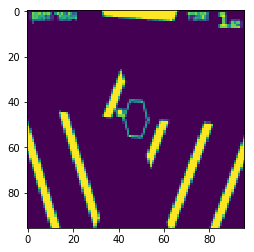

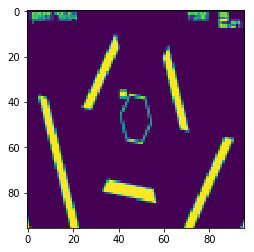

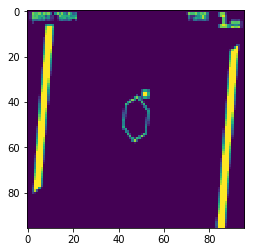

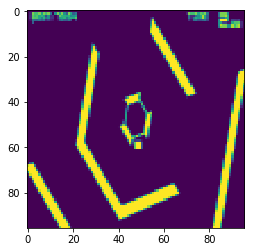

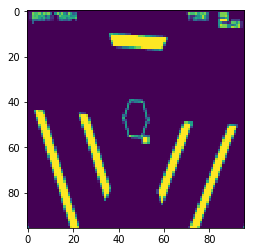

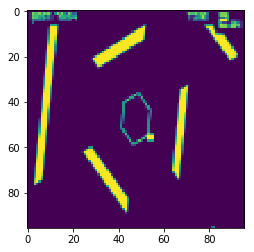

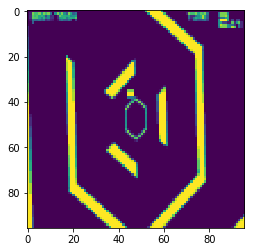

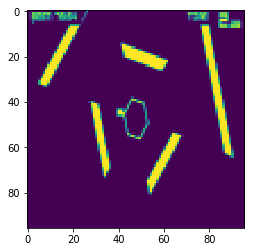

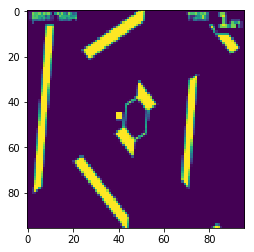

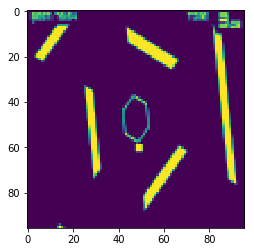

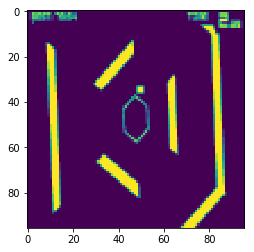

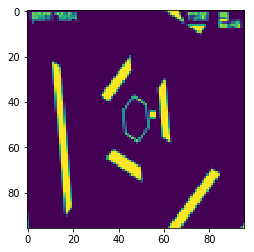

In [90]:
def get_ship_center(frame):
    center = frame[160:320, 300:468]
    _, contours, _ = cv2.findContours(
        center,
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE,
        offset=(300, 160),
    )

    match_coefficients = [cv2.matchShapes(contour, ship_contour, 1, 0.0) for contour in contours]
    closest_idx = np.argmin(match_coefficients)
    closest_contour = contours[closest_idx]
    
    return np.mean(closest_contour, axis=0)[0][::-1].astype(int)
    
#     for contour in contours:
#         approx = cv2.approxPolyDP(contour, 0.07 * cv2.arcLength(contour, True), True)

#         if len(approx) == 3:
#             return np.mean(contour, axis=0)[0][::-1].astype(int)

for frame_path in glob.glob('../screenshots/screenshot_*.png'):
    frame = imageio.imread(frame_path)
    frame = process_frame(frame)
    ship_center = get_ship_center(frame)
    
    if ship_center is not None:
        y, x = ship_center
        frame[y-8:y+8, x-12:x+12] = 255
    
    frame = cv2.resize(
        frame,
        (96, 96),
        interpolation=cv2.INTER_AREA,
    )

    plt.figure()
    plt.imshow(frame)